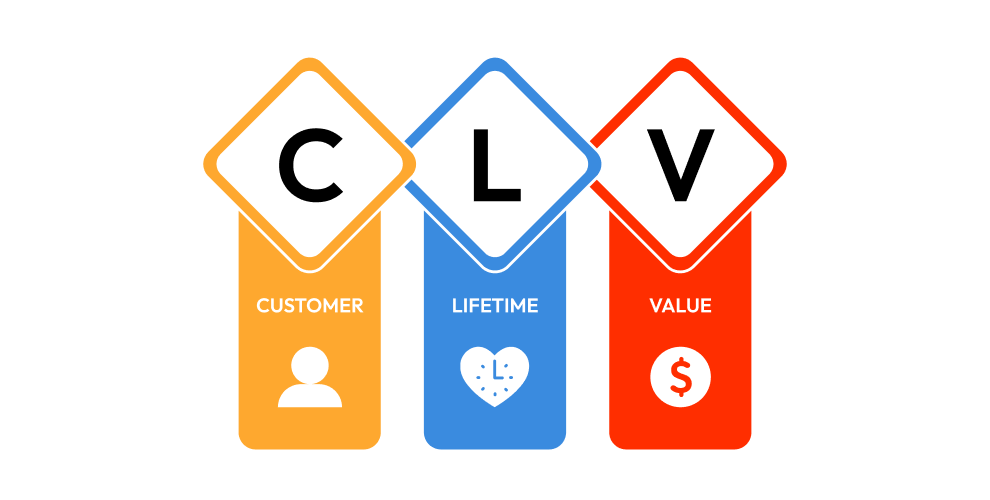

In [1]:
import os
from IPython.display import Image, display

file_path = '/kaggle/input/clv-image/64a6e6195504bebc190de7e1_Aret. CLV Alex.png'

display(Image(filename=file_path))

# Customer Life Time Values Analysis

Customer Lifetime Value Analysis is a metric that measures the total net value a customer will bring to a business from the beginning to the end of their relationship. This analysis helps businesses better understand their customers, optimize marketing strategies, and increase profitability.

**Customer Lifetime Value Calculation:**

---



There are several methods to calculate Customer Lifetime Value (CLV). The most basic formula is as follows:

CLV
=
Average Order Value
×
Purchase Frequency
×
Customer Lifespan



Components:

**1. Average Order Value (AOV):** The average amount a customer spends per purchase.

**2. Purchase Frequency:** The number of times a customer makes a purchase within a given period.

**3. Customer Lifespan:** The average time a customer remains in a relationship with the business. For example, 9 months, 2 years etc.

**3 Ways to Calculate Profit Margins**
  
  ---
  
* gross_margin_rate = (Revenue - Cost of goods sold) / Revenue X 100
* operation_margin_rate = (Revenue - Cost of Goods Sold - Business Operating Expenses) / Revenue X 100
* net_margin_rate = (Revenue - Cost of goods sold- Business Operating Expenses - interests - taxes - debt repayments) / Revenue X 100

**Variables**

---


* InvoiceNo: Invoice number. Unique number for each transaction, that is, the invoice. Canceled transaction if it starts with C.
* StockCode: Product code. Unique number for each product.
* Description: Product name
* Quantity: Number of products. Indicates how many of the products on the invoices were sold.
* InvoiceDate: Invoice date and time.
* UnitPrice: Product price (in pounds)
* Customer ID: Unique customer number
* Country: Country name. Country where the customer lives.

## Importing Libraries

In [2]:
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Examining Dataset

In [3]:
df_ = pd.read_excel("/kaggle/input/online-retail-excel/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
# We remove the returned ones from the dataframe.
df = df[~df['Invoice'].str.contains('C',na=False)]
df = df[df['Quantity']>0]
df = df.dropna(subset= ['Customer ID'])

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,407695.00000,13.58669,1.00000,2.00000,5.00000,12.00000,19152.00000,96.84223
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.00000,3.29419,0.00000,1.25000,1.95000,3.75000,10953.50000,34.75666
Customer ID,407695.00000,15368.50411,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000,1679.79570


In [8]:
df['Total Price'] = df['Quantity'] * df['Price']

In [9]:
cltv_df = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'Total Price': lambda x: x.sum()})
cltv_df.columns = ['Total_transactions', 'Total_unit', 'Total_price']

## Average Order Value

In [10]:
cltv_df['average_order_value'] = cltv_df['Total_price'] / cltv_df['Total_unit']

## Purchase Frequency

In [11]:
cltv_df['purchase_frequency'] = cltv_df['Total_transactions'] / cltv_df.shape[0]

## Repeat Rate & Churn Rate

In [12]:
repeat_rate = cltv_df[cltv_df['Total_transactions']>1].shape[0] / cltv_df.shape[0]
churn_rate = 1- repeat_rate

## Profit Margin

### **3 Ways to Calculate Profit Margins**
* gross_margin_rate = (Revenue - Cost of goods sold) / Revenue X 100
* operation_margin_rate = (Revenue - Cost of Goods Sold - Business Operating Expenses) / Revenue X 100
* net_margin_rate = (Revenue - Cost of goods sold- Business Operating Expenses - interests - taxes - debt repayments) / Revenue X 100






In [13]:
Revenue = 100
Cost_of_gs = 40
Boe = 10
int_tax_debt = 10

gross_margin_rate = (Revenue - Cost_of_gs) / Revenue # 0.6 We use gross margin rate.
operation_margin_rate = (Revenue - Cost_of_gs - Boe) / Revenue # 0.4
net_margin_rate = (Revenue - Cost_of_gs - Boe - int_tax_debt) / Revenue # 0.3


## Customer Value

In [14]:
cltv_df['customer_value'] = cltv_df['average_order_value'] * cltv_df['purchase_frequency']

## Customer Lifetime Value
**CLTV = (customer_value / churn_rate) x profit_margin**

In [15]:
cltv_df['cltv'] = (cltv_df['customer_value']/ churn_rate) * gross_margin_rate
cltv_df.sort_values(by='cltv',ascending=False).head()

,Total_transactions,Total_unit,Total_price,average_order_value,purchase_frequency,customer_value,cltv
Customer ID,,,,,,,
15760.00000,2,2,13916.34000,6958.17000,0.00046,3.22586,5.87601
12918.00000,1,1,10953.50000,10953.50000,0.00023,2.53906,4.62498
15202.00000,3,3,6001.49000,2000.49667,0.00070,1.39117,2.53406
12737.00000,2,2,3710.50000,1855.25000,0.00046,0.86011,1.56671
14802.00000,2,2,1502.98000,751.49000,0.00046,0.34840,0.63462


# Creating Segments

In [16]:
cltv_df['segment'] = pd.qcut(cltv_df['cltv'], 5, labels=['E','D','C','B','A'])
cltv_df.sort_values(by='cltv',ascending=False).head()

,Total_transactions,Total_unit,Total_price,average_order_value,purchase_frequency,customer_value,cltv,segment
Customer ID,,,,,,,,
15760.00000,2,2,13916.34000,6958.17000,0.00046,3.22586,5.87601,A
12918.00000,1,1,10953.50000,10953.50000,0.00023,2.53906,4.62498,A
15202.00000,3,3,6001.49000,2000.49667,0.00070,1.39117,2.53406,A
12737.00000,2,2,3710.50000,1855.25000,0.00046,0.86011,1.56671,A
14802.00000,2,2,1502.98000,751.49000,0.00046,0.34840,0.63462,A


In [17]:
cltv_df.sort_values(by='cltv',ascending=False).tail()

,Total_transactions,Total_unit,Total_price,average_order_value,purchase_frequency,customer_value,cltv,segment
Customer ID,,,,,,,,
15775.00000,1,192,45.60000,0.23750,0.00023,0.00006,0.00010,E
14033.00000,1,576,109.44000,0.19000,0.00023,0.00004,0.00008,E
13687.00000,1,87167,11880.84000,0.13630,0.00023,0.00003,0.00006,E
14827.00000,1,5,0.00000,0.00000,0.00023,0.00000,0.00000,E
14103.00000,1,5,0.00000,0.00000,0.00023,0.00000,0.00000,E


In [18]:
cltv_df.groupby('segment').agg({'count', 'mean', 'sum'})

<ipython-input-18-d378a628f83c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_df.groupby('segment').agg({'count', 'mean', 'sum'})


Total_transactions                 Total_unit                      \
                     count    sum     mean      count      sum       mean   
segment                                                                     
E                      863    962  1.11472        863   714899  828.38818   
D                      863   1371  1.58864        863   393849  456.37196   
C                      862   2279  2.64385        862   557994  647.32483   
B                      863   3806  4.41020        863   864384 1001.60371   
A                      863  10797 12.51101        863  3008098 3485.62920   

        Total_price                          average_order_value              \
              count           sum       mean               count         sum   
segment                                                                        
E               863  390699.25300  452.72219                 863  1135.77671   
D               863  490679.34100  568.57398                 863  1758.77144   
C               862  842218.33100  977.05143                 862  1889.32030   
B               863 1462442.89100 1694.60358                 863  2066.32851   
A               863 5645963.45800 6542.25198                 863 29719.84767   

                 purchase_frequency                 customer_value           \
            mean              count     sum    mean          count      sum   
segment                                                                       
E        1.31608                863 0.22299 0.00026            863  0.27631   
D        2.03797                863 0.31780 0.00037            863  0.55658   
C        2.19179                862 0.52828 0.00061            862  0.97285   
B        2.39436                863 0.88224 0.00102            863  1.73756   
A       34.43783                863 2.50278 0.00290            863 15.35292   

                 cltv                   
           mean count      sum    mean  
segment                                 
E       0.00032   863  0.50332 0.00058  
D       0.00064   863  1.01382 0.00117  
C       0.00113   862  1.77208 0.00206  
B       0.00201   863  3.16503 0.00367  
A       0.01779   863 27.96586 0.03241

## Preparation of the File to be Proposed for Campaigns

In [19]:
cltv_df.to_csv('cltv_segments.csv')